<a href="https://colab.research.google.com/github/dvillasxUdg/ti_p2/blob/main/TI_1_Practica2_Github.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctica 2

**Nombre:** Damian Alfonso Villaseñor Cisneros

**e-mail:** damian.villasenor3846@alumnos.udg.mx

## MODULES

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from plotly.subplots import make_subplots
import plotly.graph_objects as go


from scipy.stats import wrapcauchy
from scipy.stats import levy_stable

import pickle

## CLASSES

In [2]:
################# http://www.pygame.org/wiki/2DVectorClass ##################
class Vec2d(object):
    """2d vector class, supports vector and scalar operators,
       and also provides a bunch of high level functions
       """
    __slots__ = ['x', 'y']

    def __init__(self, x_or_pair, y = None):
        if y == None:
            self.x = x_or_pair[0]
            self.y = x_or_pair[1]
        else:
            self.x = x_or_pair
            self.y = y

    # Addition
    def __add__(self, other):
        if isinstance(other, Vec2d):
            return Vec2d(self.x + other.x, self.y + other.y)
        elif hasattr(other, "__getitem__"):
            return Vec2d(self.x + other[0], self.y + other[1])
        else:
            return Vec2d(self.x + other, self.y + other)

    # Subtraction
    def __sub__(self, other):
        if isinstance(other, Vec2d):
            return Vec2d(self.x - other.x, self.y - other.y)
        elif (hasattr(other, "__getitem__")):
            return Vec2d(self.x - other[0], self.y - other[1])
        else:
            return Vec2d(self.x - other, self.y - other)

    # Vector length
    def get_length(self):
        return math.sqrt(self.x**2 + self.y**2)

    # rotate vector
    def rotated(self, angle):
        cos = math.cos(angle)
        sin = math.sin(angle)
        x = self.x*cos - self.y*sin
        y = self.x*sin + self.y*cos
        return Vec2d(x, y)

## Actividad 1: Lévy distribution - N Curves (3 pts)

* Generar al menos las 4 curvas de distribución timpo Lévy stable que se observan en la imagen
* Visualizar con **plotly**

* Parametros m = 3.0, Levy_exponent = x, beta = 0


In [ ]:
# Base Parameters
miu = 3.0
beta = 0.0

# Levy's alphas
levy_exponents = [0.1, 0.5, 1.0, 1.9]

x = np.linspace(miu - 5, miu + 5, 500)

# Init Figure Plotly
fig = go.Figure()

for alpha in levy_exponents:
  # Levy PDF
  y = np.array([levy_stable.pdf(i,alpha=alpha, beta=beta, loc=miu) for i in x])
  # Add trace
  fig.add_trace(go.Scatter(x=x,
                             y=y,
                             marker=dict(size=2),
                             line=dict(width=2),
                             name=f'Levy_{alpha}',
                             showlegend=True))
fig.show()

## Actividad 2: Lévy distribution - Histogram + Curve (4 pts)

* A partir de un conjunto de valores aleatorios extraidos de una distribución tipo Lévy stable, obtener su histograma y comparar con la curva correspondiente PDF
* Visualizar con **matplotlib**

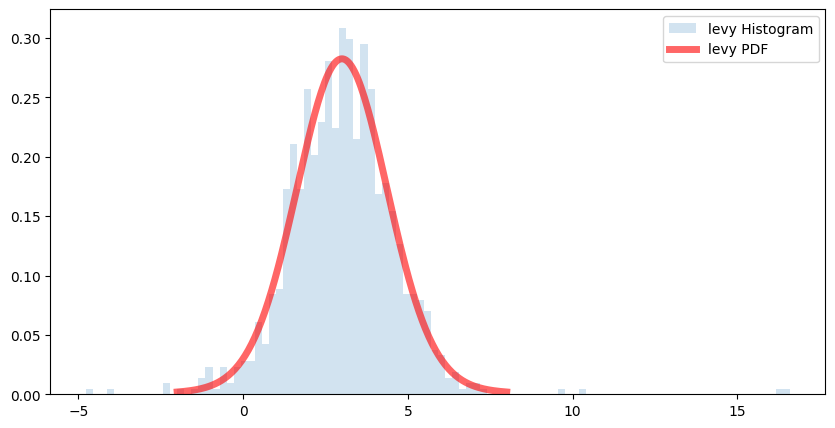

In [ ]:
# Init parameters
resolution = 200
sample_size = 1000

# Levy parameters
miu = 3.0
beta = 0.0
alpha = 1.9

x = np.linspace(miu - 5, miu + 5, resolution)

# Levy RVS
levy_rvs = levy_stable.rvs(alpha=alpha, beta=beta, loc=miu, size = sample_size)

# Levy PDF
y = np.array([levy_stable.pdf(i,alpha=alpha, beta=beta, loc=miu) for i in x])

# Custom Plot
fig, ax = plt.subplots(1,1)
fig.set_figheight(5)
fig.set_figwidth(10)

# Set Histogram
ax.hist(levy_rvs, bins= 100, density= True, histtype='stepfilled',alpha=0.2,label="levy Histogram")

# Set plot
ax.plot(x, y,'r-',lw=5, alpha=0.6,label='levy PDF')

ax.legend(loc='best')

plt.show()

## Actividad 3: Lévy ﬂight - Vec2d - 1 Trajectory (6 pts)

* Utilizar **Vec2d**
* Guardar trayectorias en **Pandas** Data Frame
* Visualizar proyección en 3d con **plotly**

In [50]:
# Initialize variables
n_steps = 400
s_pos = Vec2d(0, 0)
speed = 1.0

# Parameters for wrapcauchy distribution
CRW_exponent = 0.5
# Parameters for levy_stable distribution
alpha = 1.9
beta = 0.0
miu = 3.0

# Initialize velocity vector
velocity = Vec2d(speed, 0)
trayectoria = []

for i in range(n_steps):
    # Choose angle turn using wrapcauchy distribution
    turn_angle = wrapcauchy.rvs(CRW_exponent)

    # Choose number of steps using levy_stable distribution
    num_steps = max(1, int(levy_stable.rvs(alpha=alpha, beta=beta, loc=miu)))

    # Update position for each step
    for _ in range(num_steps):
        velocity = velocity.rotated(turn_angle)
        s_pos = s_pos + velocity
        trayectoria.append([s_pos.x, s_pos.y])

# Store the Brownian Walker trajectory in a Pandas DataFrame
df = pd.DataFrame(trayectoria, columns=['x', 'y'])

# Plot 3D Figure using Plotly
fig_BM_3d = go.Figure()
fig_BM_3d.add_trace(go.Scatter3d(
    x=df['x'],
    y=df['y'],
    z=np.array(range(len(df))),
    mode='lines',
    name='Lévy Flight 3D',
    showlegend=True
))

fig_BM_3d.show()

## Actividad 4: Correlated Random Walk - Vec2d - N Trajectories (7 pts)

* Generar tantas trayectorias tipo CRW como se especifique en una variable n_traj
* Cada una de las trayectorias debera tener un coeficiente de Cauchy diferente
* Utilizar **Vec2d**
* Guardar trayectorias en **Pandas** Data Frame
* Visualizar proyección en 3d con **plotly**
* Exportar trayectorias como *pkl*

In [46]:
# Initialize variables
n_steps = 1000
n_traj = 6
speed = 1
traj_matrices = []

# Correlated Random Walk
for i in range(n_traj):
    s_pos = Vec2d(0, 0)
    velocity = Vec2d(speed, 0)
    CRW_exponent = np.random.uniform(0.1, 0.99) # Random cauchy value
    traj_matrix = np.ones(shape=(n_steps, 2)) * np.array([s_pos.x, s_pos.y])

    for j in range(1, n_steps):
        turn_angle = wrapcauchy.rvs(CRW_exponent)
        velocity = velocity.rotated(turn_angle)
        s_pos = s_pos + velocity
        traj_matrix[j, 0] = s_pos.x
        traj_matrix[j, 1] = s_pos.y

    traj_matrices.append((traj_matrix, CRW_exponent))

# Store trajectories in a Pandas DataFrame
traj_data = []
for i, (traj_matrix, exponent) in enumerate(traj_matrices):
    traj_data.extend([(i, step, x, y, exponent) for step, (x, y) in enumerate(traj_matrix)])

df = pd.DataFrame(traj_data, columns=['Trajectory', 'Step', 'X', 'Y', 'Exponent'])


# Plot 3D Figures using Plotly
fig_BM_3d = go.Figure()
for i, (traj_matrix, exponent) in enumerate(traj_matrices):
    traj_df = df[df['Trajectory'] == i]
    fig_BM_3d.add_trace(go.Scatter3d(
        x=traj_df['X'],
        y=traj_df['Y'],
        z=traj_df['Step'],
        mode='lines',
        name=f'CRW, Cauchy {exponent:.2f}',
        showlegend=True
    ))

fig_BM_3d.update_layout(
    title="N Correlated Random Walk",
)

fig_BM_3d.show()

# Export trajectories to a pkl file
with open('trajectories.pkl', 'wb') as f:
    pickle.dump(traj_matrices, f)